In [1]:
#Analysis of winedataset and predicting the quality of wine

In [2]:
#Importing required libraries

In [4]:
import warnings
warnings.simplefilter("ignore")
#imported libarary file for ignoring warnings

In [5]:
#Loading the dataset
import pandas as pd
df=pd.read_csv("G:\Data science projects\dataset1-master\dataset1-master\winedataset.csv")
df.head() #accessing first 5 rows of dataset

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
# Now we would be checking the dimension of data
print("Rows,Columns",df.shape)

Rows,Columns (178, 14)


In [7]:
# The dimension of the dataset is of rows=178 and columns=14

Data Preparation

In [8]:
#Statistical summary of the dataset
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


1)Here we can see that there are no missing values as all 178 rows are present

2)Also there is no much difference observed between the mean and the median so there would be no outliers but validation is required

In [9]:
# checking the datatype of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity of ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  diluted wines         178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


There is no categeorical column in the dataset so no encoding is required

In [10]:
#checking existence of null values
df.isnull().sum()

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
diluted wines           0
Proline                 0
dtype: int64

As all values are zero no null value is present in the dataset

# EDA

Univariate analysis

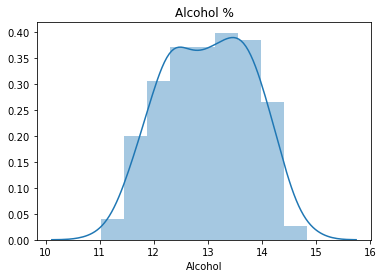

In [11]:
#importing necessary files for analysis
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

sn.distplot(df["Alcohol"])
plt.title("Alcohol %")
plt.show()

The data is normally distributed in alcohol

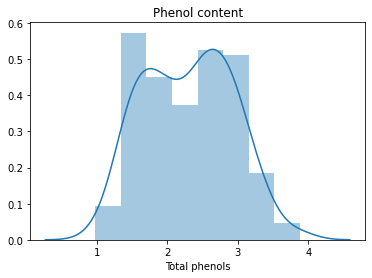

In [26]:
sn.distplot(df["Total phenols"])
plt.title("Phenol content")
plt.show()

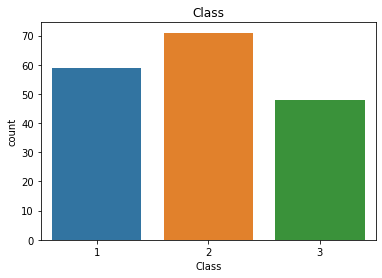

In [27]:
# Plotting the class column
sn.countplot(df["Class"])
plt.title("Class")
plt.show()

# BI variate analysis

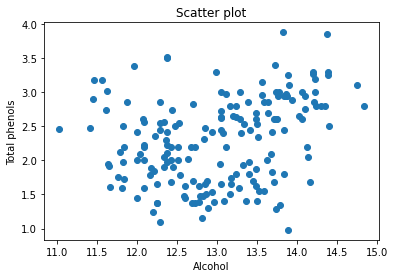

In [28]:
#plotting scatter plot to analyse the relationship between alcohol and total phenols
plt.scatter(df["Alcohol"],df["Total phenols"])
plt.title("Scatter plot")
plt.xlabel("Alcohol")
plt.ylabel("Total phenols")
plt.show()

# Multivariate analysis

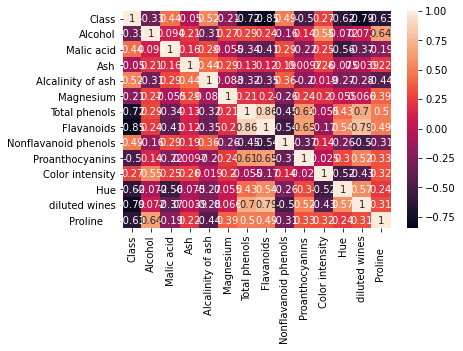

In [31]:
#checking correlation using heatmap
corr=df.corr() #provides correlation value for each column
sn.heatmap(corr,annot=True)
plt.show()